In [151]:
#Project 1 - Military Spending

#imports
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [152]:
#set options
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.precision',2)
pd.options.display.float_format = '{:20,.0f}'.format #shows values in int format not scientific notation

In [153]:
#read in military spending file and view
milex = pd.read_excel('SIPRI-Milex-data-1949-2016.xlsx',sheetname='Constant (2015) USD',skiprows=5,index_col=0)
milex.head()
# military spending in millions of 2015 USD 
# '. .' data unavailable
# 'xxx' country did not exist / was not independent
# need to remove columns to show 2000-2016

,Unnamed: 1,Notes,1949,1950,1951,1952,1953,1954,1955,1956,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2016 Current
Country,,,,,,,,,,,,,,,,,,,,,
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,NaN,1,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,...,"4,622","5,020","5,313","7,603","8,001","8,642","9,953","10,413","10,654","10,217"
Libya,NaN,‡ ¶ 2,xxx,xxx,. .,. .,. .,. .,. .,. .,...,"1,433",. .,. .,. .,"3,110","4,054","3,738",. .,. .,. .
Morocco,NaN,3,xxx,xxx,xxx,xxx,xxx,xxx,xxx,102,...,"2,533","2,704","2,894","2,915","3,125","3,570","3,540","3,268","3,293","3,327"


In [154]:
#remove rows where current data unavailable / does not exist
milex = milex[milex[2016] != '. .']
milex = milex[milex[2016] != 'xxx']
milex.shape

(174, 71)

In [155]:
#remove all years before 2000 & extraneous columns
for year in range(1949, 2000):
    del milex[year] 
del milex['2016 Current']
del milex['Unnamed: 1']
del milex['Notes']
milex.shape

(174, 17)

In [156]:
#sort by 2016 spending and look at top 10 for years 2000 - 2016
milex = milex.sort_values(by=2016, ascending = False)
milex = milex[:10]
milex

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,,,,,,,
USA,"415,259","418,631","470,042","534,984","583,090","610,898","620,387","636,674","683,776","738,621","758,890","749,533","706,918","650,851","610,636","596,010","606,233"
"China, P.R.","43,261","52,216","60,685","65,543","72,467","80,197","92,652","103,670","113,542","137,512","144,499","156,009","169,382","185,152","200,915","214,093","225,713"
Russian Federation,"20,982","22,679","25,123","26,338","27,536","31,293","34,633","37,698","41,423","43,458","44,338","47,321","54,832","57,500","61,622","66,419","70,345"
Saudi Arabia,"30,782","32,784","28,781","28,993","32,232","38,838","44,243","50,962","50,018","51,398","53,494","54,222","61,352","70,313","82,527","87,186","61,358"
France,"50,923","50,768","51,815","53,372","54,833","53,714","53,957","54,164","53,622","57,240","54,623","53,288","52,551","52,419","53,195","55,342","55,681"
India,"27,287","28,238","28,150","28,779","33,430","35,576","35,747","36,179","41,036","48,315","48,508","48,978","48,804","48,445","50,813","51,295","55,631"
UK,"48,981","50,964","54,265","58,167","58,846","59,337","59,720","61,610","64,360","65,610","64,230","61,518","58,896","56,408","54,938","53,862","54,217"
Japan,"40,888","41,604","41,811","41,864","41,697","41,622","41,091","40,557","40,167","40,919","41,063","41,616","41,114","40,940","41,159","41,103","41,569"
Germany,"42,268","41,573","41,686","41,117","39,857","39,237","38,331","38,364","39,467","40,958","41,405","40,221","41,180","38,803","38,628","39,813","40,985"


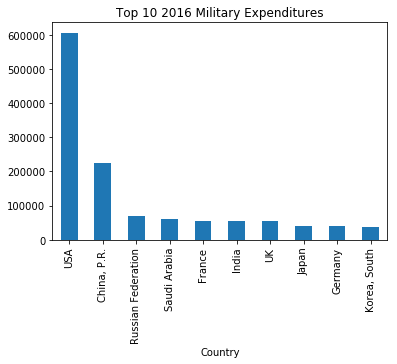

In [157]:
milex[2016].plot.bar()
plt.title('Top 10 2016 Military Expenditures')
plt.show()

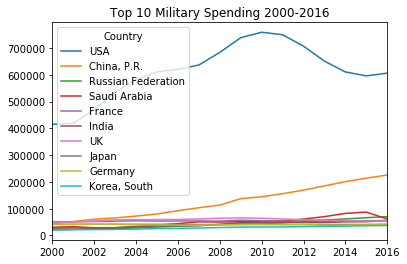

In [158]:
milex.T.plot()
plt.title('Top 10 Military Spending 2000-2016')
plt.show()
#graph not very helpful -- usa and china take over the graph

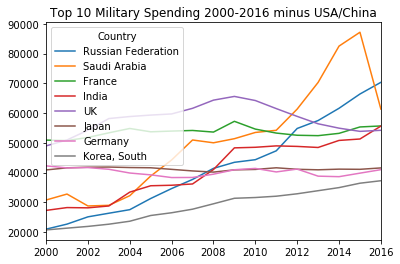

In [159]:
#look at countries not named USA/China
noUSChina = milex[2:10]
noUSChina.T.plot()
plt.title('Top 10 Military Spending 2000-2016 minus USA/China')
plt.show()

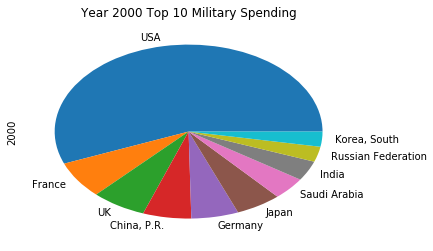

In [160]:
#top 10 military spending in year 2000
milex[2000].sort_values(ascending=False).plot.pie()
plt.title('Year 2000 Top 10 Military Spending')
plt.show()

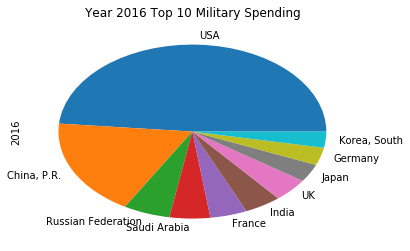

In [161]:
#2016 top 10 military spending
milex[2016].sort_values(ascending=False).plot.pie()
plt.title('Year 2016 Top 10 Military Spending')
plt.show()
#china...

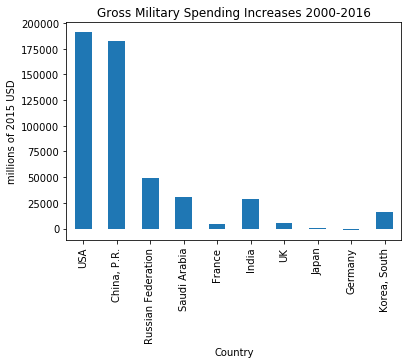

In [162]:
#show gross increase in spending from 2000-2016
gross = milex[2016] - milex[2000]
gross.plot.bar()
plt.title('Gross Military Spending Increases 2000-2016')
plt.ylabel('millions of 2015 USD')
plt.show()
#china has almost matched usa's increase in spending
#USA is fastest growing nation in gross spending over this time period
#France, UK, Japan, Germany are stagnant - hardly any change

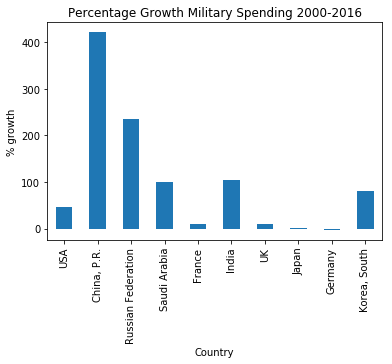

In [163]:
#percentage growth in spending
growth = 100.0 * ((milex[2016] / milex[2000]) - 1.0)
growth.plot.bar()
plt.title('Percentage Growth Military Spending 2000-2016')
plt.ylabel('% growth')
plt.show()
#China is fastest growing nation by percentage over this time period

In [164]:
#military spending per person
percap = pd.read_excel('SIPRI-Milex-data-1949-2016.xlsx',sheetname='Per capita',skiprows=6,index_col=0)
percap.head()

,Notes,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,,,,,,,,,,,
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,1,42,34,35,21,39,46,47,43,49,...,115,149,149,157,236,249,266,250,263,253
Libya,‡ ¶ 2,. .,. .,. .,. .,. .,. .,. .,. .,. .,...,106,180,. .,. .,. .,475,633,600,. .,. .
Morocco,3,38,40,43,45,47,48,51,53,53,...,78,94,96,98,103,103,122,119,95,96


In [165]:
countries = milex.index
for c in percap.index:
    if c not in countries and c != 'USSR/Russia': #called 'Russian Federation' in milex df
        percap = percap.drop([c])
        
for year in range(1988,2000):
    del percap[year]
del percap['Notes']    

percap = percap.sort_values(by=2016, ascending = False)
percap #displays per person military spending

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,,,,,,,
Saudi Arabia,933,955,816,803,869,"1,026","1,164","1,360","1,429","1,506","1,611","1,686","1,915","2,219","2,615","2,764","1,978"
USA,"1,066","1,094","1,237","1,427","1,583","1,700","1,766","1,846","2,040","2,176","2,253","2,277","2,175","2,017","1,909","1,852","1,886"
France,569,557,606,759,871,864,885,978,"1,059","1,068",981,"1,021",945,978,992,859,862
UK,599,598,669,788,902,916,948,"1,079","1,064",931,926,954,920,889,920,832,741
"Korea, South",299,278,302,337,377,465,526,575,537,504,574,628,644,689,745,724,729
Germany,344,335,359,430,467,468,470,526,596,590,575,599,577,570,572,493,509
USSR/Russia,63,80,96,117,145,190,241,304,393,360,410,490,569,616,591,463,483
Japan,362,324,312,336,358,349,327,319,364,404,429,477,472,386,368,325,365
"China, P.R.",18,22,25,27,31,35,42,52,65,79,86,102,116,132,147,156,156


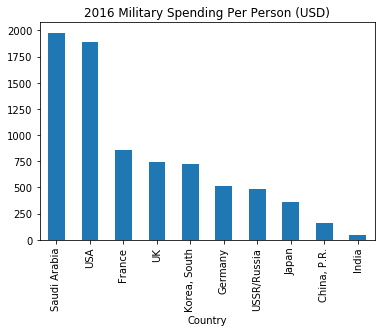

In [166]:
percap[2016].plot.bar()
plt.title('2016 Military Spending Per Person (USD)')
plt.show()

In [167]:
#military spending represented as proportion of GDP 
pd.options.display.float_format = '{:20,.3f}'.format
gdp = pd.read_excel('SIPRI-Milex-data-1949-2016.xlsx',sheetname='Share of GDP',skiprows=5,index_col=0)
gdp = gdp[:-8] #get rid of mess at end
gdp.head()

,Notes,1949,1950,1951,1952,1953,1954,1955,1956,1957,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,,,,,,,,,,,
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,1,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,...,0.029,0.030,0.038,0.035,0.043,0.045,0.048,0.055,0.063,0.067
Libya,‡ ¶ 2,xxx,xxx,. .,. .,. .,. .,. .,. .,. .,...,0.009,0.012,. .,. .,. .,0.033,0.055,0.078,. .,. .
Morocco,3,xxx,xxx,xxx,xxx,xxx,xxx,xxx,0.012,0.018,...,0.030,0.032,0.033,0.034,0.033,0.035,0.038,0.037,0.032,0.032


In [168]:
for c in gdp.index:
    if c not in countries:
        gdp = gdp.drop([c])
        
for year in range(1949,2000):
    del gdp[year]
del gdp['Notes'] 

gdp = gdp.sort_values(by=2016, ascending=False)
gdp #military expenditures as proportion of GDP

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,,,,,,,
Saudi Arabia,0.106,0.115,0.098,0.087,0.081,0.077,0.078,0.085,0.074,0.096,0.086,0.072,0.077,0.090,0.107,0.135,0.104
Russian Federation,0.036,0.038,0.041,0.039,0.035,0.036,0.035,0.034,0.033,0.041,0.038,0.037,0.040,0.042,0.045,0.049,0.053
USA,0.029,0.029,0.032,0.036,0.038,0.038,0.038,0.038,0.042,0.046,0.047,0.046,0.042,0.038,0.035,0.033,0.033
"Korea, South",0.025,0.024,0.023,0.023,0.023,0.025,0.025,0.025,0.026,0.027,0.026,0.026,0.026,0.026,0.026,0.026,0.027
India,0.031,0.029,0.028,0.027,0.028,0.028,0.025,0.023,0.026,0.029,0.027,0.027,0.025,0.025,0.025,0.024,0.025
France,0.025,0.024,0.024,0.025,0.025,0.024,0.023,0.023,0.023,0.025,0.023,0.023,0.022,0.022,0.022,0.023,0.023
"China, P.R.",0.019,0.021,0.022,0.021,0.021,0.020,0.020,0.019,0.019,0.021,0.019,0.019,0.019,0.019,0.019,0.019,0.019
UK,0.023,0.023,0.024,0.024,0.023,0.023,0.022,0.022,0.024,0.025,0.024,0.023,0.022,0.021,0.020,0.019,0.019
Germany,0.014,0.014,0.014,0.014,0.013,0.013,0.013,0.012,0.013,0.014,0.014,0.013,0.013,0.012,0.012,0.012,0.012


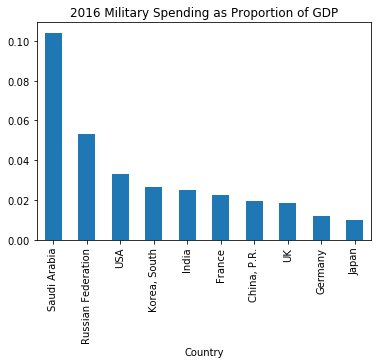

In [169]:
gdp[2016].plot.bar()
plt.title('2016 Military Spending as Proportion of GDP')
plt.show()

In [170]:
#create GDP per capita table by dividing percap table by gdp table 
GDPpercapita = percap.copy()
for country in GDPpercapita.index:
    if (country == 'USSR/Russia'):
        countrygdp = gdp.loc['Russian Federation']
    else: 
        countrygdp = gdp.loc[country]
    GDPpercapita.loc[country] = (GDPpercapita.loc[country] / countrygdp)

GDPpercapita = GDPpercapita.sort_values(by=2016, ascending=False)
GDPpercapita

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,,,,,,,
USA,"36,355.443","37,165.645","38,054.105","39,554.925","41,818.087","44,214.615","46,362.430","47,993.749","48,341.210","46,930.990","48,291.548","49,674.707","51,319.338","52,632.007","54,447.251","56,054.003","57,283.316"
Germany,"23,776.621","23,810.345","25,414.999","30,675.906","34,582.035","35,171.336","36,992.565","42,489.950","46,451.519","42,384.318","42,419.289","46,653.738","43,903.213","46,300.771","47,771.047","41,549.731","42,781.676"
UK,"26,306.610","25,883.343","28,234.812","32,642.396","38,400.533","40,061.740","42,586.369","48,457.483","45,256.503","37,108.384","38,393.852","41,032.970","41,132.477","41,875.449","45,855.186","44,004.240","39,887.164"
France,"23,060.434","23,164.229","24,993.090","30,580.048","34,851.652","35,940.414","37,758.810","42,993.224","46,887.077","43,007.487","42,010.904","45,227.521","42,185.605","44,007.766","44,308.094","37,563.565","37,943.658"
Japan,"37,634.594","33,021.457","31,531.366","34,009.069","36,725.464","36,005.045","34,268.356","34,234.398","38,087.380","39,540.677","43,162.030","46,408.646","46,834.054","38,927.067","36,431.424","32,767.714","36,947.411"
"Korea, South","12,154.919","11,465.380","13,021.715","14,465.847","16,163.847","18,866.038","21,122.393","23,216.933","20,660.015","18,479.645","22,295.806","24,362.756","24,649.249","26,192.445","28,184.760","27,396.677","27,468.161"
Saudi Arabia,"8,808.875","8,315.739","8,317.909","9,186.310","10,756.016","13,273.714","14,826.906","15,947.436","19,436.877","15,655.113","18,753.953","23,256.096","24,883.154","24,646.030","24,406.485","20,481.771","18,996.326"
USSR/Russia,"1,774.016","2,112.150","2,368.366","2,993.051","4,125.661","5,350.668","6,910.660","8,974.121","11,774.500","8,695.354","10,748.237","13,376.894","14,239.016","14,675.398","13,057.779","9,443.706","9,086.165"
"China, P.R.",951.921,"1,046.764","1,143.658","1,285.888","1,503.684","1,755.078","2,096.558","2,684.371","3,440.525","3,802.007","4,478.394","5,520.044","6,250.193","6,985.908","7,616.712","8,029.049","8,061.568"


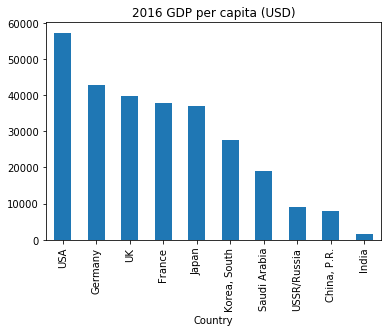

In [172]:
GDPpercapita[2016].plot.bar()
plt.title('2016 GDP per capita (USD)')
plt.show()

In [173]:
#compare GDP per person to military expenditures per person
pd.options.display.float_format = '{:20,.0f}'.format
milexpercap16 = percap[2016]
gdppercap16 = GDPpercapita[2016]
countries = percap.index
d = {'Military Expenditures PerCap': milexpercap16, 'GDP PerCap': gdppercap16}
milexgdp = pd.DataFrame(data=d,index = countries)
milexgdp

,GDP PerCap,Military Expenditures PerCap
Country,,
Saudi Arabia,"18,996","1,978"
USA,"57,283","1,886"
France,"37,944",862
UK,"39,887",741
"Korea, South","27,468",729
Germany,"42,782",509
USSR/Russia,"9,086",483
Japan,"36,947",365
"China, P.R.","8,062",156


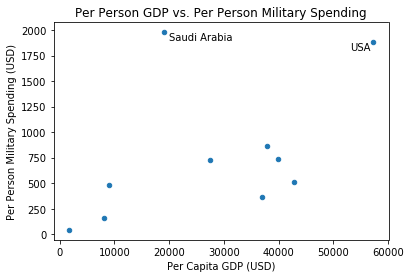

In [174]:
#plot per capita gdp vs. per capita milex
milexgdp.plot.scatter('GDP PerCap','Military Expenditures PerCap')
plt.title('Per Person GDP vs. Per Person Military Spending')
plt.xlabel('Per Capita GDP (USD)')
plt.ylabel('Per Person Military Spending (USD)')
plt.annotate('USA',xy=(57283,1886),xytext=(53000,1800))
plt.annotate('Saudi Arabia',xy=(18996,1978),xytext=(20000,1900))
plt.show()